In [9]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.optimizers import SGD

In [10]:
data_frame = pd.read_csv('/home/matheusrmeloo/Documentos/ML/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [11]:
data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
data_frame['Chance of Admit '] = (data_frame['Chance of Admit '] >= .7).astype(int)
data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [13]:
data = data_frame[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values.tolist()

data = keras.utils.to_categorical(data)

In [14]:
data2 = data_frame[['Chance of Admit ']].values.tolist()

data2 = keras.utils.to_categorical(data2)

In [15]:
X = data_frame.iloc[:,0:8]
y = data_frame.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [16]:
classifier = Sequential()

classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[-1]))

classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [17]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [18]:
var = classifier.fit(X_train,y_train, batch_size=10, epochs=500, validation_data=(X_test, y_test))

Train on 350 samples, validate on 150 samples
Epoch 1/500
350/350 [==============================] - 0s 677us/step - loss: 0.6954 - acc: 0.4514 - val_loss: 0.6914 - val_acc: 0.5867
Epoch 2/500
350/350 [==============================] - 0s 129us/step - loss: 0.6894 - acc: 0.6057 - val_loss: 0.6888 - val_acc: 0.5867
Epoch 3/500
350/350 [==============================] - 0s 113us/step - loss: 0.6823 - acc: 0.6057 - val_loss: 0.6784 - val_acc: 0.5867
Epoch 4/500
350/350 [==============================] - 0s 126us/step - loss: 0.6694 - acc: 0.6057 - val_loss: 0.6735 - val_acc: 0.5867
Epoch 5/500
350/350 [==============================] - 0s 118us/step - loss: 0.6663 - acc: 0.6057 - val_loss: 0.6734 - val_acc: 0.5867
Epoch 6/500
350/350 [==============================] - 0s 136us/step - loss: 0.6672 - acc: 0.6057 - val_loss: 0.6727 - val_acc: 0.5867
Epoch 7/500
350/350 [==============================] - 0s 133us/step - loss: 0.6654 - acc: 0.6057 - val_loss: 0.6722 - val_acc: 0.5867
Epoch 8/5

Epoch 61/500
350/350 [==============================] - 0s 128us/step - loss: 0.5062 - acc: 0.7714 - val_loss: 0.5382 - val_acc: 0.7733
Epoch 62/500
350/350 [==============================] - 0s 120us/step - loss: 0.5153 - acc: 0.7571 - val_loss: 0.5200 - val_acc: 0.7800
Epoch 63/500
350/350 [==============================] - 0s 107us/step - loss: 0.4984 - acc: 0.7714 - val_loss: 0.5037 - val_acc: 0.7867
Epoch 64/500
350/350 [==============================] - 0s 112us/step - loss: 0.4919 - acc: 0.7657 - val_loss: 0.5015 - val_acc: 0.7533
Epoch 65/500
350/350 [==============================] - 0s 127us/step - loss: 0.4928 - acc: 0.7800 - val_loss: 0.4982 - val_acc: 0.7600
Epoch 66/500
350/350 [==============================] - 0s 107us/step - loss: 0.4767 - acc: 0.7829 - val_loss: 0.4842 - val_acc: 0.7533
Epoch 67/500
350/350 [==============================] - 0s 123us/step - loss: 0.4800 - acc: 0.7857 - val_loss: 0.5055 - val_acc: 0.7467
Epoch 68/500
350/350 [==========================

350/350 [==============================] - 0s 139us/step - loss: 0.4164 - acc: 0.7971 - val_loss: 0.4287 - val_acc: 0.7933
Epoch 122/500
350/350 [==============================] - 0s 121us/step - loss: 0.4150 - acc: 0.8057 - val_loss: 0.4250 - val_acc: 0.7933
Epoch 123/500
350/350 [==============================] - 0s 107us/step - loss: 0.4185 - acc: 0.8143 - val_loss: 0.4272 - val_acc: 0.7800
Epoch 124/500
350/350 [==============================] - 0s 109us/step - loss: 0.4104 - acc: 0.8029 - val_loss: 0.4293 - val_acc: 0.7733
Epoch 125/500
350/350 [==============================] - 0s 129us/step - loss: 0.4144 - acc: 0.8114 - val_loss: 0.4284 - val_acc: 0.7800
Epoch 126/500
350/350 [==============================] - 0s 110us/step - loss: 0.4018 - acc: 0.8143 - val_loss: 0.4618 - val_acc: 0.7733
Epoch 127/500
350/350 [==============================] - 0s 103us/step - loss: 0.4157 - acc: 0.7971 - val_loss: 0.4657 - val_acc: 0.7800
Epoch 128/500
350/350 [==============================] 

Epoch 181/500
350/350 [==============================] - 0s 158us/step - loss: 0.3963 - acc: 0.8200 - val_loss: 0.4195 - val_acc: 0.7733
Epoch 182/500
350/350 [==============================] - 0s 119us/step - loss: 0.3973 - acc: 0.8171 - val_loss: 0.4251 - val_acc: 0.7800
Epoch 183/500
350/350 [==============================] - 0s 111us/step - loss: 0.4070 - acc: 0.8286 - val_loss: 0.4198 - val_acc: 0.7867
Epoch 184/500
350/350 [==============================] - 0s 123us/step - loss: 0.3936 - acc: 0.8143 - val_loss: 0.4166 - val_acc: 0.7933
Epoch 185/500
350/350 [==============================] - 0s 118us/step - loss: 0.4019 - acc: 0.8229 - val_loss: 0.4273 - val_acc: 0.7800
Epoch 186/500
350/350 [==============================] - 0s 116us/step - loss: 0.4059 - acc: 0.8114 - val_loss: 0.4160 - val_acc: 0.7933
Epoch 187/500
350/350 [==============================] - 0s 104us/step - loss: 0.4051 - acc: 0.8114 - val_loss: 0.4166 - val_acc: 0.7933
Epoch 188/500
350/350 [==================

Epoch 241/500
350/350 [==============================] - 0s 90us/step - loss: 0.3841 - acc: 0.8343 - val_loss: 0.4469 - val_acc: 0.7867
Epoch 242/500
350/350 [==============================] - 0s 96us/step - loss: 0.3821 - acc: 0.8229 - val_loss: 0.4467 - val_acc: 0.7867
Epoch 243/500
350/350 [==============================] - 0s 87us/step - loss: 0.3834 - acc: 0.8343 - val_loss: 0.4334 - val_acc: 0.7867
Epoch 244/500
350/350 [==============================] - 0s 90us/step - loss: 0.3832 - acc: 0.8400 - val_loss: 0.4167 - val_acc: 0.8000
Epoch 245/500
350/350 [==============================] - 0s 96us/step - loss: 0.3815 - acc: 0.8114 - val_loss: 0.4178 - val_acc: 0.7933
Epoch 246/500
350/350 [==============================] - 0s 92us/step - loss: 0.3921 - acc: 0.8371 - val_loss: 0.4180 - val_acc: 0.8133
Epoch 247/500
350/350 [==============================] - 0s 92us/step - loss: 0.4009 - acc: 0.8429 - val_loss: 0.4250 - val_acc: 0.7933
Epoch 248/500
350/350 [=========================

350/350 [==============================] - 0s 104us/step - loss: 0.3789 - acc: 0.8400 - val_loss: 0.4264 - val_acc: 0.7933
Epoch 302/500
350/350 [==============================] - 0s 102us/step - loss: 0.3777 - acc: 0.8371 - val_loss: 0.4142 - val_acc: 0.8067
Epoch 303/500
350/350 [==============================] - 0s 100us/step - loss: 0.3802 - acc: 0.8257 - val_loss: 0.4150 - val_acc: 0.7933
Epoch 304/500
350/350 [==============================] - 0s 97us/step - loss: 0.3748 - acc: 0.8486 - val_loss: 0.4149 - val_acc: 0.8200
Epoch 305/500
350/350 [==============================] - 0s 108us/step - loss: 0.3748 - acc: 0.8286 - val_loss: 0.4140 - val_acc: 0.8067
Epoch 306/500
350/350 [==============================] - 0s 92us/step - loss: 0.3786 - acc: 0.8343 - val_loss: 0.4151 - val_acc: 0.8067
Epoch 307/500
350/350 [==============================] - 0s 112us/step - loss: 0.3814 - acc: 0.8343 - val_loss: 0.4197 - val_acc: 0.8067
Epoch 308/500
350/350 [==============================] - 

350/350 [==============================] - 0s 92us/step - loss: 0.3766 - acc: 0.8286 - val_loss: 0.4354 - val_acc: 0.8000
Epoch 362/500
350/350 [==============================] - 0s 105us/step - loss: 0.3825 - acc: 0.8457 - val_loss: 0.4181 - val_acc: 0.8000
Epoch 363/500
350/350 [==============================] - 0s 111us/step - loss: 0.3771 - acc: 0.8429 - val_loss: 0.4174 - val_acc: 0.8133
Epoch 364/500
350/350 [==============================] - 0s 164us/step - loss: 0.3787 - acc: 0.8400 - val_loss: 0.4143 - val_acc: 0.8000
Epoch 365/500
350/350 [==============================] - 0s 128us/step - loss: 0.3688 - acc: 0.8429 - val_loss: 0.4485 - val_acc: 0.7867
Epoch 366/500
350/350 [==============================] - 0s 111us/step - loss: 0.3767 - acc: 0.8457 - val_loss: 0.4288 - val_acc: 0.7933
Epoch 367/500
350/350 [==============================] - 0s 106us/step - loss: 0.3769 - acc: 0.8371 - val_loss: 0.4177 - val_acc: 0.8133
Epoch 368/500
350/350 [==============================] -

350/350 [==============================] - 0s 127us/step - loss: 0.3690 - acc: 0.8371 - val_loss: 0.4164 - val_acc: 0.7933
Epoch 422/500
350/350 [==============================] - 0s 118us/step - loss: 0.3680 - acc: 0.8486 - val_loss: 0.4270 - val_acc: 0.7933
Epoch 423/500
350/350 [==============================] - 0s 94us/step - loss: 0.3717 - acc: 0.8314 - val_loss: 0.4181 - val_acc: 0.7933
Epoch 424/500
350/350 [==============================] - 0s 97us/step - loss: 0.3669 - acc: 0.8314 - val_loss: 0.4128 - val_acc: 0.7933
Epoch 425/500
350/350 [==============================] - 0s 97us/step - loss: 0.3664 - acc: 0.8457 - val_loss: 0.4242 - val_acc: 0.7933
Epoch 426/500
350/350 [==============================] - 0s 106us/step - loss: 0.3731 - acc: 0.8400 - val_loss: 0.4101 - val_acc: 0.8000
Epoch 427/500
350/350 [==============================] - 0s 146us/step - loss: 0.3688 - acc: 0.8343 - val_loss: 0.4253 - val_acc: 0.7867
Epoch 428/500
350/350 [==============================] - 0

350/350 [==============================] - 0s 97us/step - loss: 0.3751 - acc: 0.8400 - val_loss: 0.4073 - val_acc: 0.8133
Epoch 482/500
350/350 [==============================] - 0s 99us/step - loss: 0.3692 - acc: 0.8286 - val_loss: 0.4093 - val_acc: 0.8000
Epoch 483/500
350/350 [==============================] - 0s 92us/step - loss: 0.3586 - acc: 0.8343 - val_loss: 0.4185 - val_acc: 0.7733
Epoch 484/500
350/350 [==============================] - 0s 92us/step - loss: 0.4066 - acc: 0.8114 - val_loss: 0.4261 - val_acc: 0.7600
Epoch 485/500
350/350 [==============================] - 0s 97us/step - loss: 0.3830 - acc: 0.8200 - val_loss: 0.4314 - val_acc: 0.7733
Epoch 486/500
350/350 [==============================] - 0s 95us/step - loss: 0.3657 - acc: 0.8543 - val_loss: 0.4090 - val_acc: 0.7933
Epoch 487/500
350/350 [==============================] - 0s 99us/step - loss: 0.3806 - acc: 0.8286 - val_loss: 0.4082 - val_acc: 0.7933
Epoch 488/500
350/350 [==============================] - 0s 10

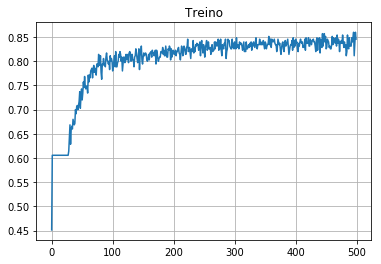

In [19]:
plt.title('Treino')
plt.grid(True)
plt.plot(var.history['acc'])
plt.show()

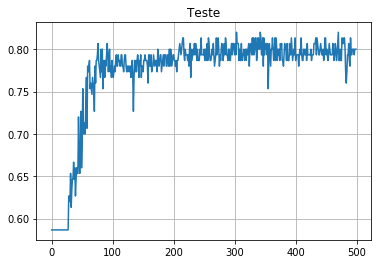

In [20]:
plt.title('Teste')
plt.grid(True)
plt.plot(var.history['val_acc'])
plt.show()